In [1]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

# Toggle cell visibility

from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

# Hide the code completely

# from IPython.display import HTML
# tag = HTML('''<style>
# div.input {
#     display:none;
# }
# </style>''')
# display(tag)

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import scipy.signal as signal
from ipywidgets import widgets, interact

## PID krmilnik - zaprtozančni sistem

Proporcionalno-integrirni-diferencirni (PID) krmilni algoritem je najpogosteje uporabljen krmilni algoritem. Njegovo prenosno funkcijo zapišemo kot:

\begin{equation}
    P(s)=K_p \cdot \left( 1 + \frac{1}{T_i s} + T_d s \right).
\end{equation}

Prenosna funkcija je sestavljena iz vsote proporcionalne, integrirne in diferencirne komponente. Ni nujno, da so v izbranem krmilniku prisotne vse tri komponente; če ni diferencirne ali integrirne komponente, govorimo tako o PI oz. PD krmilniku. V tem interaktivnem primeru je prikazan odziv P, Pi, PD in PID krmilnika na enotsko skočno, enotsko impulzno in sinusno funkcijo ter enotsko rampo. Krmilnik je v tem primeru del krmilnega sistema s povratno zvezo. Objekt je lahko proporcionalni objekt ničtega, prvega ali drugega reda, ali pa integrirni objekt ničtega ali prvega reda. 

Spodnji grafi prikazujejo.
1. Odziv zaprtozančnega sistema na izbran vstopni signal, izbran tip objekta in izbrani krmilnik (levi graf).
2. Lego ničel in polov prenosne funkcije rezultirajočega zaprtozancnega sistema.

---

### Kako upravljati s tem interaktivnim primerom?
1. Izberi vstopni signal s preklapljanjem med *enotsko skočno funkcijo*, *enotsko impulzno funkcijo*, *enotsko rampo* in *sinusno funkcijo*.
2. Izberi tip objekta: *P0* (proporcionalni objekt ničtega reda), *P1* (proporcionalni objekt prvega reda), *I0* (integrirni objekt ničtega reda) ali *I1* (integrirni objekt prvega reda). Prenosna funkcija objekta P0 je $k_p$ (v tem interaktivnem primeru $k_p=2$), PI objekta $\frac{k_p}{\tau s+1}$ (v tem interaktivnem primeru $k_p=1$ and $\tau=2$), IO objekta $\frac{k_i}{s}$ (v tem interaktivnem primeru $k_i=\frac{1}{10}$) in I1 objekta $\frac{k_i}{s(\tau s +1)}$ (v tem interaktivnem primeru $k_i=1$ in $\tau=10$).
3. Izberi tip krmilnega algoritma s klikom na *P*, *PI*, *PD* ali *PID* gumb.
4. Z uporabo drsnikov spreminjaj vrednosti koeficientov proporcionalnega ($K_p$), integrirnega ($T_i$) in diferencirnega ($T_d$) ojačnja. 
5. Z uporabo drsnika $t_{max}$ lahko spreminjaš interval vrednosti prikazanih na x osi.

<!-- A proportional–integral–derivative (PID) control algorithm is by far the most common control algorithm. Its transfer function is equal to:

\begin{equation}
    P(s)=K_p \cdot \left( 1 + \frac{1}{T_i s} + T_d s \right).
\end{equation}

It is made as a sum of proportional, integral and derivative channels. Not all of them have to be present, so PI or PD control algorithms are also used. In this example the response of a P, PI, PD or PID controller is shown for unit step,  unit impulse, unit ramp or sine input. The controller is in this case part of a feedback control system. The object can either be a proportional of the zeroth, first or second order, or an integral of zeroth or first order.

The plots below show:
1. The response of the closed-loop system for the selected input, object type and the selected controller (left figure).
2. The position of the zeros and poles of the transfer function of the resulting closed-loop system.

---

### How to use this notebook?
1. Toggle between *unit step function*, *unit impulse function*, *unit ramp function*, and *sine* to select the input signal.
2. Click on *P0*, *P1*, *I0* or *I1* to toggle between the following objects: proportional of the zeroth, first or second order, or an integral one of zeroth or first order. The transfer function of P0 object is $k_p$ (in this example $k_p=2$), of PI object $\frac{k_p}{\tau s+1}$ (in this example $k_p=1$ and $\tau=2$), of IO object $\frac{k_i}{s}$ (in this example $k_i=\frac{1}{10}$) and of I1 object $\frac{k_i}{s(\tau s +1}$ (in this example $k_i=1$ and $\tau=10$).
3. Click on the *P*, *PI*, *PD* and *PID* buttons to toogle between proportional, proportional-integral, proportional-derivative and proportional–integral–derivative control algorithm type.
4. Move the sliders to change the values of proportional ($K_p$), integral ($T_i$) and derivative ($T_d$) PID tunning coefficients.
5. Move the slider $t_{max}$ to change the maximum value of the time on x axis of the Time response plot. -->

<IPython.core.display.Javascript object>


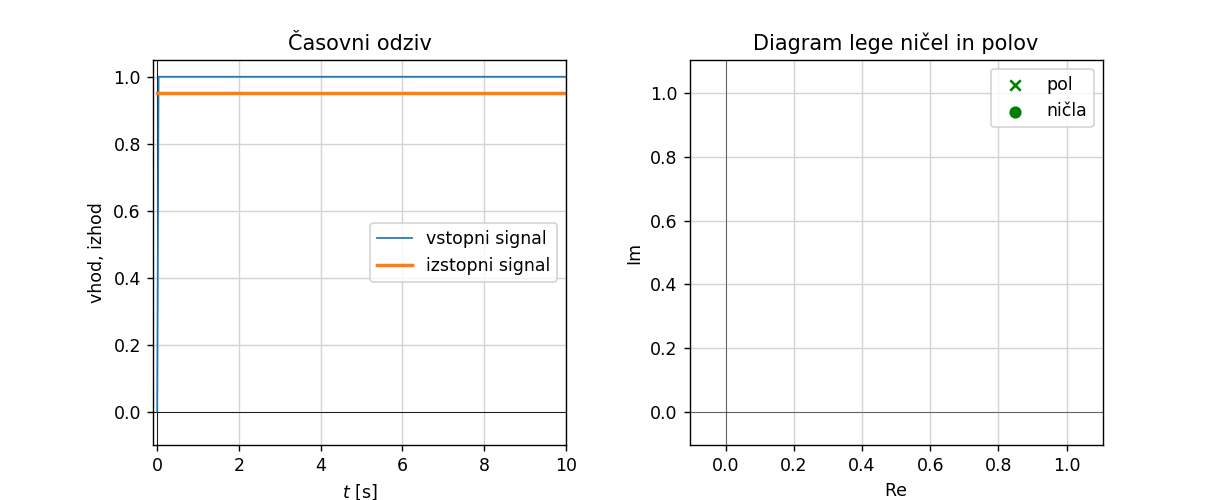

ToggleButtons(description='Izberi vstopni signal:', options=('enotska skočna funkcija', 'enotska impulzna funk…

ToggleButtons(description='Izberi tip objekta:', options=('P0', 'P1', 'I0', 'I1'), style=ToggleButtonsStyle(de…

ToggleButtons(description='Izberi tip krmilnega algoritma:', options=('P', 'PI', 'PD', 'PID'), style=ToggleBut…

interactive(children=(IntSlider(value=10, description='\\(K_p\\)', max=50, min=1, readout_format='.1d'), Float…

In [3]:
A = 10
a=0.1
s, P, I, D = sym.symbols('s, P, I, D')

obj = 1/(A*s)
PID = P + P/(I*s) + P*D*s#/(a*D*s+1)
system = obj*PID/(1+obj*PID)
num = [sym.fraction(system.factor())[0].expand().coeff(s, i) for i in reversed(range(1+sym.degree(sym.fraction(system.factor())[0], gen=s)))]
den = [sym.fraction(system.factor())[1].expand().coeff(s, i) for i in reversed(range(1+sym.degree(sym.fraction(system.factor())[1], gen=s)))]

# make figure
fig = plt.figure(figsize=(9.8, 4),num='PID krmilnik - zaprtozančni sistem')
plt.subplots_adjust(wspace=0.3)

# add axes
ax = fig.add_subplot(121)
ax.grid(which='both', axis='both', color='lightgray')
ax.set_title('Časovni odziv')
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('vhod, izhod')
ax.axhline(linewidth=.5, color='k')
ax.axvline(linewidth=.5, color='k')

rlocus = fig.add_subplot(122)


input_type = 'enotska skočna funkcija'

# plot step function and responses (initalisation)
input_plot, = ax.plot([],[],'C0', lw=1, label='vstopni signal')
response_plot, = ax.plot([],[], 'C1', lw=2, label='izstopni signal')
ax.legend()




rlocus_plot, = rlocus.plot([], [], 'r')

plt.show()

def update_plot(KP, TI, TD, Time_span):
    global num, den, input_type
    
    num_temp = [float(i.subs(P,KP).subs(I,TI).subs(D,TD)) for i in num]
    den_temp = [float(i.subs(P,KP).subs(I,TI).subs(D,TD)) for i in den]
    system = signal.TransferFunction(num_temp, den_temp)
    zeros = np.roots(num_temp)
    poles = np.roots(den_temp)
    
    rlocus.clear()
    rlocus.scatter([np.real(i) for i in poles], [np.imag(i) for i in poles], marker='x', color='g', label='pol')
    rlocus.scatter([np.real(i) for i in zeros], [np.imag(i) for i in zeros], marker='o', color='g', label='ničla')
    rlocus.set_title('Diagram lege ničel in polov')
    rlocus.set_xlabel('Re')
    rlocus.set_ylabel('Im')
    rlocus.grid(which='both', axis='both', color='lightgray')
    
    time = np.linspace(0, Time_span, 300)
    
    if input_type == 'enotska skočna funkcija':
        u = np.ones_like(time)
        u[0] = 0
        time, response = signal.step(system, T=time)
    elif input_type == 'enotska impulzna funkcija':
        u = np.zeros_like(time)
        u[0] = 10
        time, response = signal.impulse(system, T=time)
    elif input_type == 'sinusna funkcija':
        u = np.sin(time*2*np.pi)
        time, response, _ = signal.lsim(system, U=u, T=time)
    elif input_type == 'enotska rampa':
        u = time
        time, response, _ = signal.lsim(system, U=u, T=time)
    else:
        raise Exception("Error in the program. Please restart simulation.")
        
    response_plot.set_data(time, response)
    input_plot.set_data(time, u)
    
    rlocus.axhline(linewidth=.3, color='k')
    rlocus.axvline(linewidth=.3, color='k')
    rlocus.legend()
    
    ax.set_ylim([min([np.min(u), min(response),-.1]),min(100,max([max(response)*1.05, 1, 1.05*np.max(u)]))])
    ax.set_xlim([-0.1,max(time)])

    plt.show()

controller_ = PID
object_ = obj

def calc_tf():
    global num, den, controller_, object_
    system_func = object_*controller_/(1+object_*controller_)
    
    num = [sym.fraction(system_func.factor())[0].expand().coeff(s, i) for i in reversed(range(1+sym.degree(sym.fraction(system_func.factor())[0], gen=s)))]
    den = [sym.fraction(system_func.factor())[1].expand().coeff(s, i) for i in reversed(range(1+sym.degree(sym.fraction(system_func.factor())[1], gen=s)))]
    update_plot(Kp_widget.value, Ti_widget.value, Td_widget.value, time_span_widget.value)

def transfer_func(controller_type):
    global controller_
    proportional = P
    integral = P/(I*s)
    differential = P*D*s/(a*D*s+1)
    if controller_type =='P':
        controller_func = proportional
        Kp_widget.disabled=False
        Ti_widget.disabled=True
        Td_widget.disabled=True
    elif controller_type =='PI':
        controller_func = proportional+integral
        Kp_widget.disabled=False
        Ti_widget.disabled=False
        Td_widget.disabled=True
    elif controller_type == 'PD':
        controller_func = proportional+differential
        Kp_widget.disabled=False
        Ti_widget.disabled=True
        Td_widget.disabled=False
    else:
        controller_func = proportional+integral+differential
        Kp_widget.disabled=False
        Ti_widget.disabled=False
        Td_widget.disabled=False
    
    controller_ = controller_func
    calc_tf()
    
def transfer_func_obj(object_type):
    global object_
    if object_type == 'P0':
        object_ = 2
    elif object_type == 'P1':
        object_ = 1/(2*s+1) 
    elif object_type == 'I0':
        object_ = 1/(10*s)
    elif object_type == 'I1':
        object_ = 1/(s*(10*s+1))
    calc_tf()

style = {'description_width': 'initial'}

def buttons_controller_clicked(event):
    controller = buttons_controller.options[buttons_controller.index]
    transfer_func(controller)
buttons_controller = widgets.ToggleButtons(
    options=['P', 'PI', 'PD', 'PID'],
    description='Izberi tip krmilnega algoritma:',
    disabled=False,
    style=style)
buttons_controller.observe(buttons_controller_clicked)

def buttons_object_clicked(event):
    object_ = buttons_object.options[buttons_object.index]
    transfer_func_obj(object_)
buttons_object = widgets.ToggleButtons(
    options=['P0', 'P1', 'I0', 'I1'],
    description='Izberi tip objekta:',
    disabled=False,
    style=style)
buttons_object.observe(buttons_object_clicked)

def buttons_input_clicked(event):
    
    global input_type
    input_type = buttons_input.options[buttons_input.index]
    update_plot(Kp_widget.value, Ti_widget.value, Td_widget.value, time_span_widget.value)
buttons_input = widgets.ToggleButtons(
    options=['enotska skočna funkcija','enotska impulzna funkcija', 'enotska rampa', 'sinusna funkcija'],
    description='Izberi vstopni signal:',
    disabled=False,
    style = {'description_width': 'initial','button_width':'180px'})
buttons_input.observe(buttons_input_clicked)
    
Kp_widget = widgets.IntSlider(value=10,min=1,max=50,step=1,description=r'\(K_p\)',
    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.1d')
Ti_widget = widgets.FloatLogSlider(value=1.,min=-3,max=1.1,step=.001,description=r'\(T_{i} \)',
    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.3f')
Td_widget = widgets.FloatLogSlider(value=1.,min=-3,max=1.1,step=.001,description=r'\(T_{d} \)',
    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.3f')

time_span_widget = widgets.FloatSlider(value=10.,min=.5,max=50.,step=0.1,description=r'\(t_{max} \)',
    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.1f')

transfer_func(buttons_controller.options[buttons_controller.index])
transfer_func_obj(buttons_object.options[buttons_object.index])

display(buttons_input)
display(buttons_object)
display(buttons_controller)

interact(update_plot, KP=Kp_widget, TI=Ti_widget, TD=Td_widget, Time_span=time_span_widget);